In [1]:
import mysql.connector

In [4]:
config = {
  'user': 'r',
  'password': '',
  'host': '127.0.0.1',
  'database': 'twitter',
  'raise_on_warnings': True,
}

cnx = mysql.connector.connect(**config)

In [5]:
sql = "CREATE TABLE IF NOT EXISTS tweets (a JSON);"

In [6]:
curs = cnx.cursor()

In [7]:
curs.execute(sql)

DatabaseError: 1050: Table 'tweets' already exists

In [8]:
curs.execute("TRUNCATE TABLE tweets;")

In [9]:
import gzip

In [10]:
import json

In [24]:
quote(line)

NameError: name 'quote' is not defined

In [25]:
import urllib.parse

'<A HREF="http"'

In [43]:
i = 0
with open("sample_tweets_2.json", "r") as f:
    for line in f:
        newline = line.rstrip().replace('\\','\\\\').replace("'", "\\'")
        sql = "INSERT INTO twitter.tweets (a) VALUES ('" + newline + "');"
        curs.execute(sql)
        i += 1

In [44]:
cnx.commit()

In [45]:
import datetime

In [46]:
datetime.datetime.now()

datetime.datetime(2016, 4, 24, 23, 25, 10, 1308)

In [47]:
i

1000000

In [48]:
# Took 30 minutes to insert 1 MM records

In [53]:
sql = """
SELECT CAST(a->"$.timestamp_ms" / 60000 AS SIGNED) AS m
, COUNT(1) AS t
FROM twitter.tweets
GROUP BY CAST(a->"$.timestamp_ms" / 60000 AS SIGNED)
ORDER BY m
"""

curs.execute(sql)
results = curs.fetchall()


In [54]:
results

[(None, 282737),
 (24346215, 2172),
 (24346216, 2430),
 (24346217, 2480),
 (24346218, 2379),
 (24346219, 2338),
 (24346220, 2419),
 (24346221, 2344),
 (24346222, 2342),
 (24346223, 2347),
 (24346224, 2427),
 (24346225, 2376),
 (24346226, 2453),
 (24346227, 2442),
 (24346228, 2361),
 (24346229, 2468),
 (24346230, 2741),
 (24346231, 2813),
 (24346232, 2754),
 (24346233, 2578),
 (24346234, 2429),
 (24346235, 2494),
 (24346236, 2597),
 (24346237, 2679),
 (24346238, 2467),
 (24346239, 2612),
 (24346240, 2624),
 (24346241, 2490),
 (24346242, 2478),
 (24346243, 2556),
 (24346244, 2511),
 (24346245, 2532),
 (24346246, 2532),
 (24346247, 2496),
 (24346248, 2513),
 (24346249, 2616),
 (24346250, 2595),
 (24346251, 2406),
 (24346252, 2454),
 (24346253, 2314),
 (24346254, 2469),
 (24346255, 2464),
 (24346256, 2365),
 (24346257, 2365),
 (24346258, 2373),
 (24346259, 2433),
 (24346260, 2634),
 (24346261, 2953),
 (24346262, 2566),
 (24346263, 2582),
 (24346264, 2678),
 (24346265, 2567),
 (24346266, 26

In [55]:
len(results)

317

In [56]:
%matplotlib inline

In [57]:
import matplotlib
import matplotlib.pyplot as pyplot

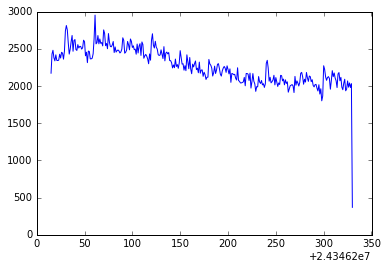

In [60]:
pyplot.plot([x[0] for x in results], [x[1] for x in results])

In [61]:
import gzip

In [62]:
import json

In [75]:
import os

In [79]:
files = os.listdir("/home/r/rcy-twitter/raw/aws")
files.sort()

AttributeError: 'list' object has no attribute 'sorted'

In [81]:
t = []

for fn in os.listdir("/home/r/rcy-twitter/raw/aws"):
    if fn.startswith("entity") and "83" not in fn:
        print(fn)
        with gzip.open(os.path.join("/home/r/rcy-twitter/raw/aws", fn), "rb") as f:
            for line in f:
                t.append(json.loads(line.decode("utf-8").rstrip()))

entity_tweets_38.json.gz
entity_tweets_30.json.gz
entity_tweets_19.json.gz
entity_tweets_64.json.gz
entity_tweets_72.json.gz
entity_tweets_59.json.gz
entity_tweets_48.json.gz
entity_tweets_51.json.gz
entity_tweets_15.json.gz
entity_tweets_35.json.gz
entity_tweets_7.json.gz
entity_tweets_17.json.gz
entity_tweets_81.json.gz
entity_tweets_34.json.gz
entity_tweets_53.json.gz
entity_tweets_33.json.gz
entity_tweets_49.json.gz
entity_tweets_80.json.gz
entity_tweets_76.json.gz
entity_tweets_79.json.gz
entity_tweets_22.json.gz
entity_tweets_45.json.gz
entity_tweets_36.json.gz
entity_tweets_11.json.gz
entity_tweets_60.json.gz
entity_tweets_50.json.gz
entity_tweets_5.json.gz
entity_tweets_28.json.gz
entity_tweets_69.json.gz
entity_tweets_13.json.gz
entity_tweets_68.json.gz
entity_tweets_55.json.gz
entity_tweets_63.json.gz
entity_tweets_24.json.gz
entity_tweets_9.json.gz
entity_tweets_67.json.gz
entity_tweets_14.json.gz
entity_tweets_73.json.gz
entity_tweets_82.json.gz
entity_tweets_29.json.gz
ent

In [82]:
len(t)

19160

In [87]:
with open("/home/r/rcy-twitter/raw/aws_texts.txt", "wt") as f:
    for line in t:
        f.write(line['text'].replace("\n"," ") + "\n")

In [73]:
t[0]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Wed Apr 27 21:27:47 +0000 2016',
 'entities': {'hashtags': [{'indices': [44, 52], 'text': 'Twitter'}],
  'symbols': [{'indices': [0, 5], 'text': 'TWTR'}],
  'urls': [{'display_url': 'stocktwits.com/DollarMilliona…',
    'expanded_url': 'http://stocktwits.com/DollarMillionaire/message/53757925',
    'indices': [62, 85],
    'url': 'https://t.co/GLfilTzmZ1'}],
  'user_mentions': [{'id': 783214,
    'id_str': '783214',
    'indices': [53, 61],
    'name': 'Twitter',
    'screen_name': 'twitter'}]},
 'favorite_count': 0,
 'favorited': False,
 'filter_level': 'low',
 'geo': None,
 'id': 725436304754880512,
 'id_str': '725436304754880512',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 0,
 'retweeted': False,
 

In [74]:
[x['text'] for x in t]

['$TWTR users aren&amp;#39;t too happy either #Twitter @twitter https://t.co/GLfilTzmZ1',
 ".@SenCapito @SenatorCarper\nPsst, uh. Gee. Aren't these YOUR Johnson &amp; Johnson $JNJ products, too ;o)?\nhttps://t.co/zDtatYv4Sj",
 'RT @stockpulp: This is one of the most relevant articles about $FB now. Facebook shatters estimates, stock rockets higher https://t.co/8bVA…',
 'Finalizing the Text2Bid acquisition will immediately make $SING a profitable company.',
 'Buzz Q: Facebook impresses with its earnings. Can $FB keep up the momentum?',
 '$DIS closes at $105.28 #Disney',
 '@GillianTan The chair is a woman. It was a guy who asked the $HLF question. $HLF',
 'Are the Odds Stacked Against Pandora this Quarter? $P https://t.co/EZMNsst750',
 'John Bean Technologies Corp $JBT Sees Large Volume Increase on Earnings Beat https://t.co/lBWPfy1xTK',
 '#Amazon loses court case over in-app purchases. Read more: https://t.co/GngPtllKVt $AMZN',
 'Why DreamWorks Animation, #BostonScientific, and Cirrus L